In [47]:
# Importamos las librerias que vamos a utilizar en el proceso
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import warnings #umporto esta libreria para avisos
warnings.filterwarnings('ignore') # deshabilitar advertencias y avisos, para que los ignore

In [48]:
# Cargamos el archivo y lo visualizamos 
data = pd.read_csv("recursos_humanos.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [49]:
# Codificamos las variables categóricas
data = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)
# Verificar las columnas después de la codificación
print(data.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')


In [50]:
# Separar características y variable objetivo y las llamamos para visualizarlas
X = data.drop('left', axis=1)
y = data['left']
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,2,160,3,0,0,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,2,143,3,0,0,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,6,280,4,0,0,False,False,False,False,False,False,False,True,False,True,False


In [51]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [52]:
# Escalamos las características 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Dividimos nuestros datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Grupo de entrenamiento", X_train.shape, y_train.shape) #lo imprimimos para visualizarlo
print("Grupo de prueba", X_test.shape, y_test.shape)

Grupo de entrenamiento (11999, 18) (11999,)
Grupo de prueba (3000, 18) (3000,)


# Modelación con SVM
Opciones de Kemel (Transformaciones)
* Linear
* Polynomial
*
Radial Basis functi
* Sigmoid     oid

# Prueba de SVM con Kernel Linear 

In [73]:
clf = svm.SVC(kernel="linear") #Generamos nuestra variiable kerner 
clf.fit(X_train, y_train) # Para el ajuste sobre el grupo de entrenamiento
yhat = clf.predict(X_test) #vamos a ocupar un nuevo grupo paea hacer la predicción
from sklearn.metrics import confusion_matrix #para bajar nuestra libreria
y_pred = clf.predict(X) #la definimos y hacemos la predicción
cm = confusion_matrix(y_test, yhat)
cm

array([[2143,  151],
       [ 543,  163]])

In [74]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.52      0.23      0.32       706

    accuracy                           0.77      3000
   macro avg       0.66      0.58      0.59      3000
weighted avg       0.73      0.77      0.73      3000



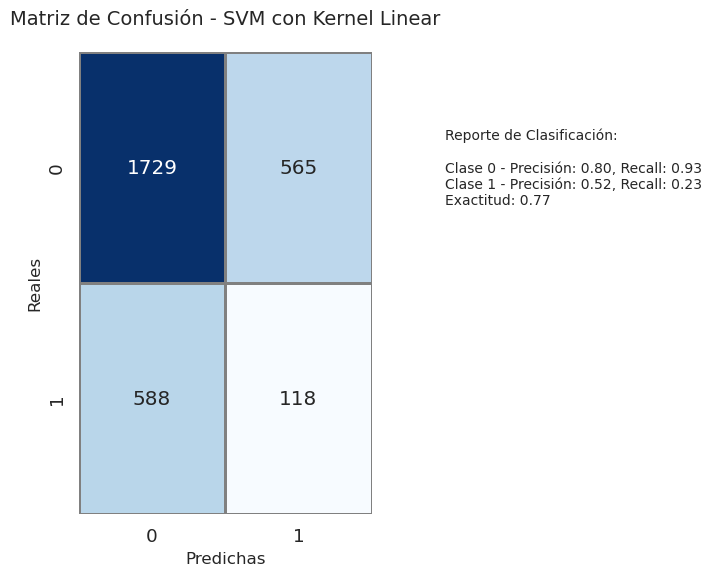

In [92]:
# Creamos el mapa de calor
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Tamaño de la fuente
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='gray')

# Configuramos los titulos
plt.title('Matriz de Confusión - SVM con Kernel Linear', pad=20, fontsize=14)
plt.xlabel('Predichas', fontsize=12)
plt.ylabel('Reales', fontsize=12)

# Añadir el reporte de clasificación como anotación de los valores previamente obtenidos
report_text = ("Reporte de Clasificación:\n\n"
               "Clase 0 - Precisión: 0.80, Recall: 0.93\n"
               "Clase 1 - Precisión: 0.52, Recall: 0.23\n"
               "Exactitud: 0.77")
plt.text(2.5, 0.5, report_text, 
         bbox=dict(facecolor='white', alpha=0.5), 
         fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.show()

# Prueba de SVM con Kernel Polynomial

In [93]:
clf = svm.SVC(kernel="poly") #Generamos nuestra variiable kerner 
clf.fit(X_train, y_train) # Para el ajuste sobre el grupo de entrenamiento
yhat = clf.predict(X_test) #vamos a ocupar un nuevo grupo paea hacer la predicción
from sklearn.metrics import confusion_matrix #para bajar nuestra libreria
y_pred = clf.predict(X) #la definimos y hacemos la predicción
cm = confusion_matrix(y_test, yhat)
cm

array([[2233,   61],
       [ 114,  592]])

In [94]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2294
           1       0.91      0.84      0.87       706

    accuracy                           0.94      3000
   macro avg       0.93      0.91      0.92      3000
weighted avg       0.94      0.94      0.94      3000



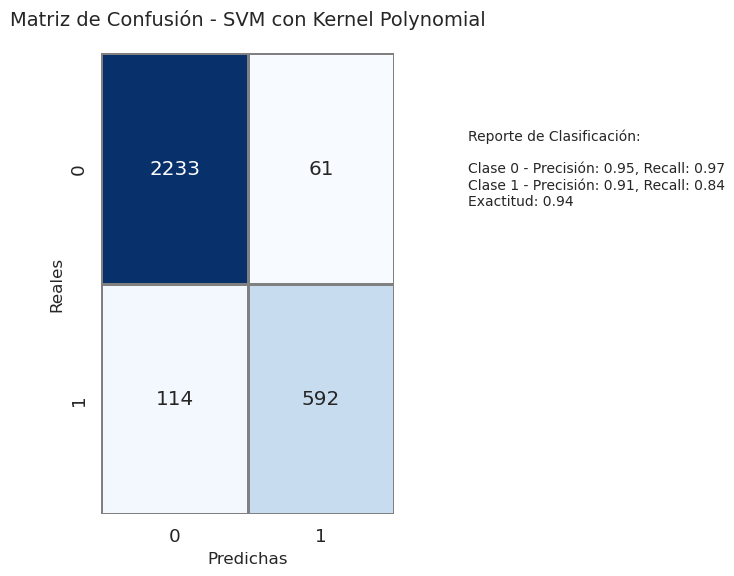

In [95]:
# Creamos el mapa de calor
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Tamaño de la fuente
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='gray')

# Configuramos los titulos
plt.title('Matriz de Confusión - SVM con Kernel Polynomial', pad=20, fontsize=14)
plt.xlabel('Predichas', fontsize=12)
plt.ylabel('Reales', fontsize=12)

# Añadir el reporte de clasificación como anotación de los valores previamente obtenidos
report_text = ("Reporte de Clasificación:\n\n"
               "Clase 0 - Precisión: 0.95, Recall: 0.97\n"
               "Clase 1 - Precisión: 0.91, Recall: 0.84\n"
               "Exactitud: 0.94")
plt.text(2.5, 0.5, report_text, 
         bbox=dict(facecolor='white', alpha=0.5), 
         fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.show()

# Prueba de SVM con Kernel RBF

In [96]:
clf = svm.SVC(kernel="rbf") #Generamos nuestra variiable kerner con RBF
clf.fit(X_train, y_train) # Para el ajuste sobre el grupo de entrenamiento
yhat = clf.predict(X_test) #vamos a ocupar un nuevo grupo paea hacer la predicción
from sklearn.metrics import confusion_matrix #para bajar nuestra libreria
y_pred = clf.predict(X) #la definimos y hacemos la predicción
cm = confusion_matrix(y_test, yhat)
cm

array([[2224,   70],
       [  76,  630]])

In [97]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2294
           1       0.90      0.89      0.90       706

    accuracy                           0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



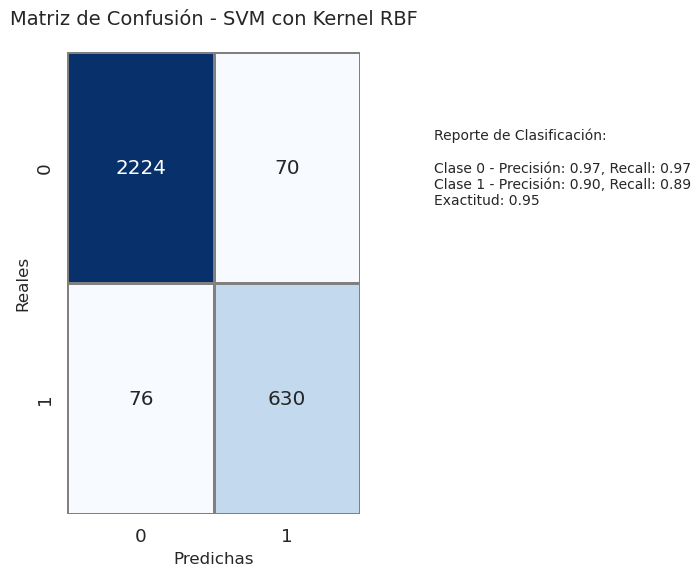

In [98]:
# Creamos el mapa de calor
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Tamaño de la fuente
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='gray')

# Configuramos los titulos
plt.title('Matriz de Confusión - SVM con Kernel RBF', pad=20, fontsize=14)
plt.xlabel('Predichas', fontsize=12)
plt.ylabel('Reales', fontsize=12)

# Añadir el reporte de clasificación como anotación de los valores previamente obtenidos
report_text = ("Reporte de Clasificación:\n\n"
               "Clase 0 - Precisión: 0.97, Recall: 0.97\n"
               "Clase 1 - Precisión: 0.90, Recall: 0.89\n"
               "Exactitud: 0.95")
plt.text(2.5, 0.5, report_text, 
         bbox=dict(facecolor='white', alpha=0.5), 
         fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.show()

# Prueba de SVM con Kernel Sigmoid

In [99]:
clf = svm.SVC(kernel="sigmoid") #Generamos nuestra variiable kerner con RBF
clf.fit(X_train, y_train) # Para el ajuste sobre el grupo de entrenamiento
yhat = clf.predict(X_test) #vamos a ocupar un nuevo grupo paea hacer la predicción
from sklearn.metrics import confusion_matrix #para bajar nuestra libreria
y_pred = clf.predict(X) #la definimos y hacemos la predicción
cm = confusion_matrix(y_test, yhat)
cm

array([[1729,  565],
       [ 588,  118]])

In [100]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2294
           1       0.17      0.17      0.17       706

    accuracy                           0.62      3000
   macro avg       0.46      0.46      0.46      3000
weighted avg       0.61      0.62      0.61      3000



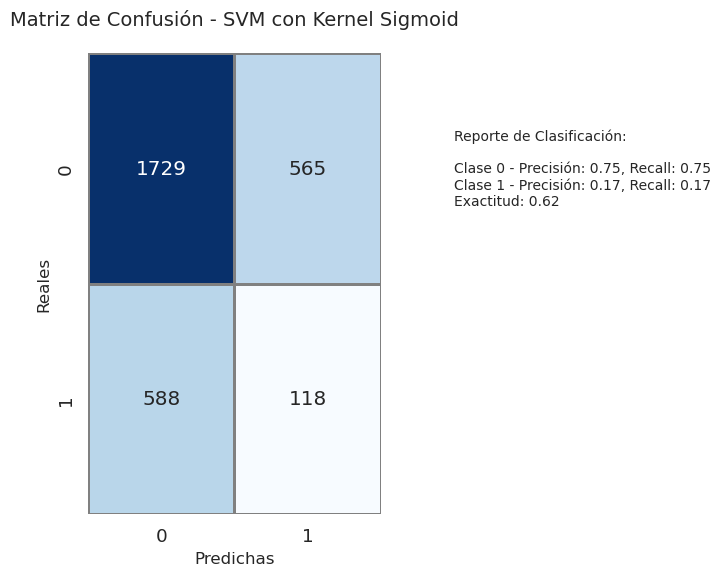

In [101]:
# Creamos el mapa de calor
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Tamaño de la fuente
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='gray')

# Configuramos los titulos
plt.title('Matriz de Confusión - SVM con Kernel Sigmoid', pad=20, fontsize=14)
plt.xlabel('Predichas', fontsize=12)
plt.ylabel('Reales', fontsize=12)

# Añadir el reporte de clasificación como anotación de los valores previamente obtenidos
report_text = ("Reporte de Clasificación:\n\n"
               "Clase 0 - Precisión: 0.75, Recall: 0.75\n"
               "Clase 1 - Precisión: 0.17, Recall: 0.17\n"
               "Exactitud: 0.62")
plt.text(2.5, 0.5, report_text, 
         bbox=dict(facecolor='white', alpha=0.5), 
         fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.show()

# ¿Cuál resultó ser el modelo predictivo más adecuado? 
El modelo SVM con kenner RBF presenta un desempeño sólido con una precisión global de 95% sin embargo existe un margen de mejora especialmente en el recall para la clase 1 empleados que dejan la empresa ya que solo captura el 89%. Si consideramos que el objetivo es identificar a los empleados que dejan la empresa, entonces es muy importante mejorar este recall, pero lo importante que podemos observar, es que este modelo nos puede indicar algunos empleados importantes que se van

In [109]:
# Ahora, entrenamos el modelo SVM con kernel RBF (mejor modelo según el análisis)
clf_rbf = SVC(kernel="rbf")
clf_rbf.fit(X_train, y_train)

# Alimentamos los datos que nos da el ejercisio solicitado (Lo coloco en lista para visualiazarlo mejor)
new_employee = pd.DataFrame({
    'satisfaction_level': [0.5],
    'last_evaluation': [0.7],
    'number_project': [4],
    'average_montly_hours': [200],
    'time_spend_company': [4],
    'Work_accident': [0],
    'promotion_last_5years': [0],
    'sales_RandD': [0], 'sales_accounting': [0], 'sales_hr': [0], 
    'sales_management': [0], 'sales_marketing': [0], 'sales_product_mng': [0],
    'sales_sales': [1], 'sales_support': [0], 'sales_technical': [0],
    'salary_low': [0], 'salary_medium': [1]
})

In [113]:
# Hacemos un ciclo For, para asegurarnos de que todas las columnas estén presentes (en el mismo orden, esto para evitar errores en la predicción)
for col in X.columns:
    if col not in new_employee.columns:
        new_employee[col] = 0
        # Reordenar columnas para que coincidan con el entrenamiento
new_employee = new_employee[X.columns]
# Hacemos nuestra Normalización o escalada de los datos del nuevo empleado
new_employee_scaled = scaler.transform(new_employee)
# Y ahora que los datos estan preparados hacemos la predicción
prediction = clf_rbf.predict(new_employee_scaled)
# Para mostrar el resultado le pido imprima el siguiente texto aunado con nuestro resultado y hamciendo la equivalencia de numero a respuesta requerida
print("\nResultado de la predicción para el nuevo empleado:")
print(f"¿El empleado dejará la empresa? ({'Sí' if prediction[0] == 1 else 'No'})")
print(f"Valor predicho: {prediction[0]} (1 = Sí dejará, 0 = No dejará)") # Explicación



Resultado de la predicción para el nuevo empleado:
¿El empleado dejará la empresa? (No)
Valor predicho: 0 (1 = Sí dejará, 0 = No dejará)
